#### DTSC6007001 - Deep Learning
Nama: Vira Fitriyani<br>
NIM: 2602068706<br>


### 1. Binary Classification

#### Import Library

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.activations import relu
from keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras import regularizers

#### Setup Data

In [202]:
path = '/content/drive/MyDrive/Colab Notebooks/Bank_Loan_Granting.csv'
df = pd.read_csv(path)

In [203]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [204]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0/80,1,0,0,0,0,1,1


In [205]:
df.shape

(5000, 14)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


About Dataset:<br>
* ID : customer ID
* Age : age of customer
* Experience : the number of years that  the customer has experience
* Income : the customer's annual earnings
* ZIP Code : the postal code of the customer's location
* Family : the number of people in the customer's family
* CCAvg : the average monthly credit card spending
* Education : the level of customer's Education(undergraduate,graduate,professional)
* Mortgage : the Value of the customer's mortgage(the thing that the customer uses as a guarantee to the bank)
* Securities Account : whether the customer has a security account or not(it's also known as an investment account)
* CD Account : the customer has a CD account or not(a type of savings account that lets the customer earn interest on a fixed amount of money for a fixed period)
* Online : the customer uses the bank's online services or not
* CreditCard : the customer uses the bank's credit card or not
* Personal Loan : the customer is granted loans or not

Karena permintaan perusahaan adalah untuk menentukan apakah sebuah pengajuan pinjaman yang dilakukan seseorang dapat diterima atau ditolak, maka kita tetapkan variable 'Personal Loan' sebagai target variable.

#### Eksplorasi dan Preprocessing Data

In [207]:
# Check Missing Value
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Tidak terdapat missing value

In [208]:
# Check duplicates rows
df[df.duplicated()]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


Tidak terdapat data yang duplikat

Problem 1: terdapat variabel yang memiliki data type object yaitu CCAvg dengan pola isi data masih menggunakan "/" sebagai pembagi rata-rata.

In [209]:
# Convert data type object to numerical
df['CCAvg'] = df['CCAvg'].apply(lambda x: eval(x.split('/')[0]) / eval(x.split('/')[1])
if eval(x.split('/')[1]) != 0 else 0)

Pendekatan yang saya lakukan yaitu:
* menggunakan fungsi '.apply' untuk menerapkan fungsi yang didefinisikan ke setiap elemen variabel CCAvg.
* fungsi 'lambda' untuk mendefinisikan fungsi yang akan diterapkan.
* fungsi 'eval' untuk mengonversi string angka menjadi numerik.
* fungsi 'x.split('/')[0]' untuk mengambil bilangan pertama atau bilangan bulat dari nilai 'x'.
* fungsi 'x.split('/')[1]' untuk mengambil bilangan kedua atau bilangan desimal dari nilai 'x'.
* kedua bagian bilangan bulat dan desimal akan dikonversi terlebih dahulu menjadi numerik, kemudian bagian bulat akan dibagi dengan bagian desimal untuk mendapatkan hasil pembagiannya sebagai bentuk data baru dari CCAvg.
* karena terdapat data yang memiliki bilangan bulat 0, saya menambahkan kondisi jika pembagi 0, maka hasilnya akan 0.

In [210]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,0.016667,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,0.020000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,0.000000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,0.028571,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,0.000000,2,0,0,0,0,0,1


In [211]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,0.011111,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.000000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.000000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.000000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.000000,1,0,0,0,0,1,1


In [212]:
df['CCAvg'].dtype

dtype('float64')

Text(0.5, 1.0, 'Variables Correlating with Personal Loan')

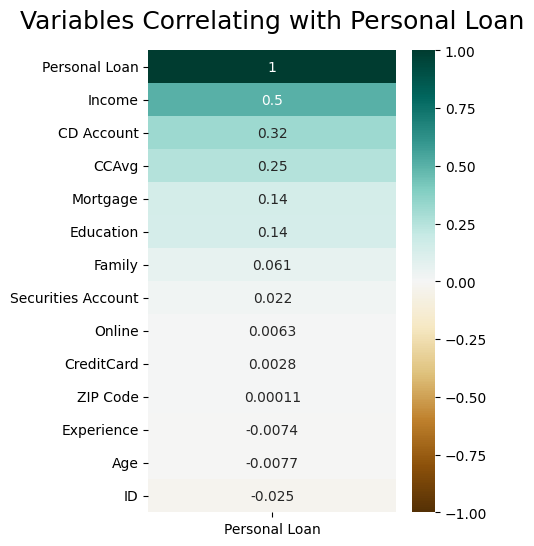

In [213]:
# Check correlation
plt.figure(figsize=(4,6))
heatmap = sns.heatmap(df.corr() [['Personal Loan']].sort_values(by='Personal Loan', ascending=False),
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Variables Correlating with Personal Loan', fontdict={'fontsize':18},pad=16)

Problem 2: Variabel yang tidak terlalu mempengaruhi target variabel
<br><br>
Melalui analisis deskriptif dan pengecekan korelasi, saya akan drop variabel ZIP Code karena berisi informasi geografis yang tidak berkaitan dengan karakteristik customer ataupun terkait perbankan.

In [214]:
df = df.drop(columns=['ZIP Code'])
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

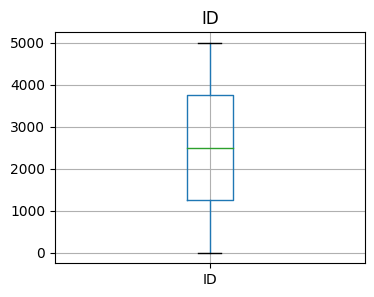

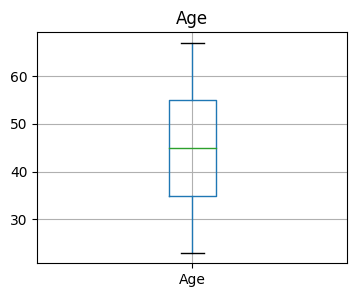

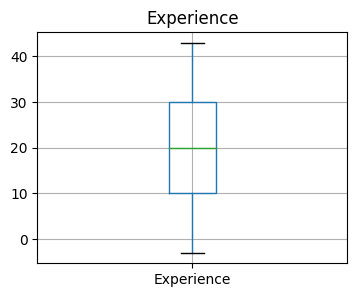

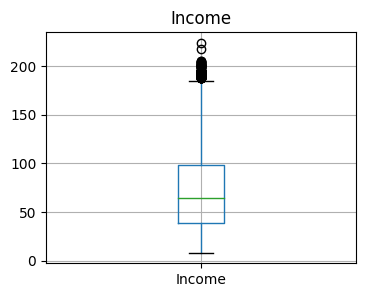

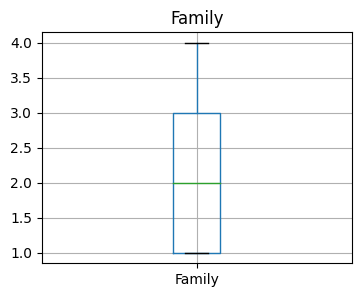

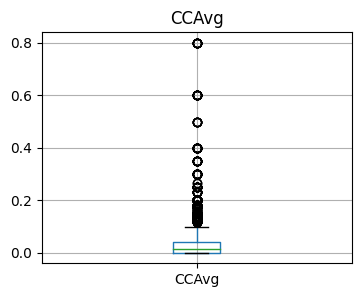

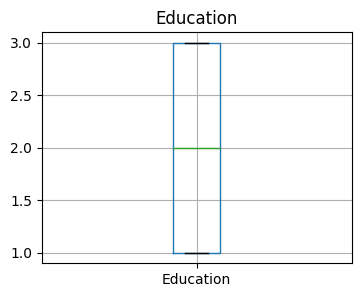

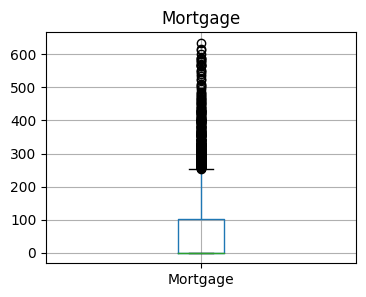

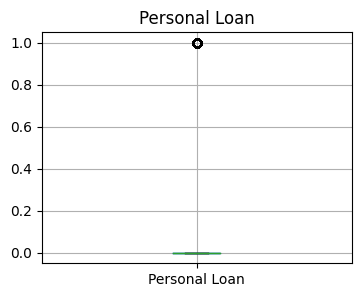

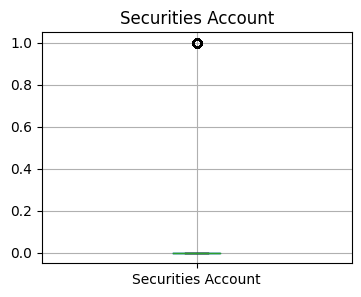

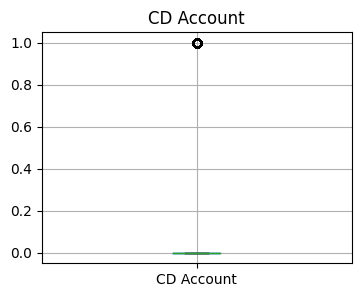

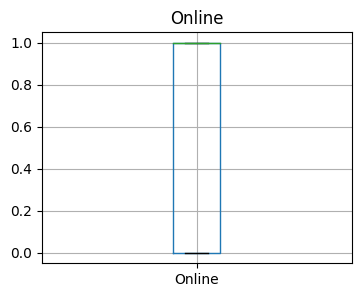

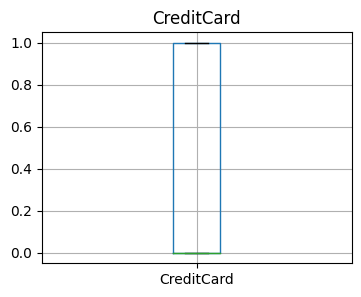

In [215]:
# Check outliers
for col in df.columns:
  plt.figure(figsize=(4,3))
  df.boxplot([col])
  plt.title(col)

plt.show()

Problem 3: Banyaknya outliers dan imbalance class

Outliers -> data yang menyimpang secara signifikan dari data normal. Outlier perlu untuk diidentifikasi dan ditangani karena  memungkinkan berdampak terhadap hasil analisis statistik.<br>

Dari visualisasi boxplot diatas, dapat dilihat beberapa variabel yang memiliki data outlier, yaitu:
* Income
* CCAvg
* Mortgage
* Personal Loan
* Securities Account
* CD Account


In [216]:
# Cek jumlah target variabel tiap klasifikasi karena terdapat outlier di kelas 1
df['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

Terdapat Class Imbalance pada target variabel yaitu Personal Loan. Dimana kelas 1 / jumlah customer yang mendapatkan pinjaman hanya 480, sedangkan kelas 0 / jumlah customer yang tidak mendapatkan pinjaman sebanyak 4520.
<br><br>
Namun, tidak memungkinkan target variable untuk dihandling.
Jika dilakukan oversampling, dapat menyebabkan overfitting dan bias karena mengubah distribusi asli. Sedangkan jika dilakukan undersampling, dapat berpotensi kehilangan informasi berharga dari kelas 0.

In [217]:
# Count jumlah outliers tiap variabel
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

df.apply(count_outliers)

ID                      0
Age                     0
Experience              0
Income                 96
Family                  0
CCAvg                 399
Education               0
Mortgage              291
Personal Loan         480
Securities Account    522
CD Account            302
Online                  0
CreditCard              0
dtype: int64

Saya tidak melakukan handling outliers karena,
1. variable 'Personal Loan' merupakan  target variable, sehingga tidak seharusnya dihapus/diubah.
2. variable 'Securities Account', dan 'CD Account' berupa data biner dan memiliki korelasi terhadap target variable.
3. variable 'Income', 'CCAvg', dan 'Mortgage' memiliki jumlah outliers yang relatif kecil dibandingkan dengan total sampel, sehingga mungkin outliersnya tidak terlalu memberikan pengaruh yang signifikan.

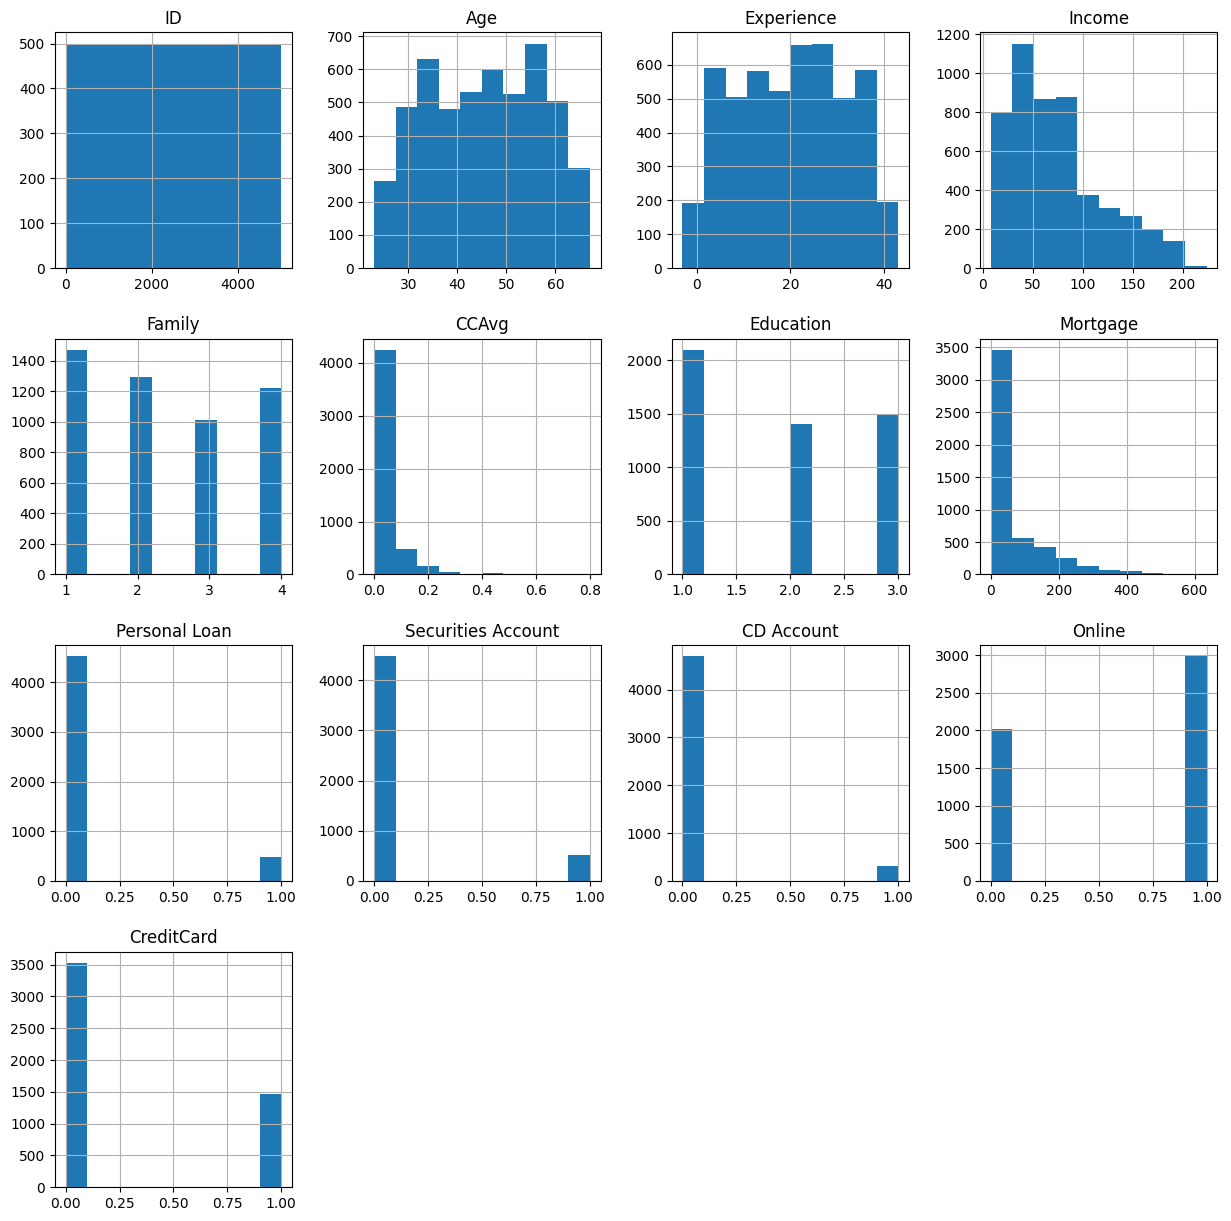

In [218]:
# Cek distribusi tiap variable
plot = df.hist(figsize=(15,15))

**Scaling Data** -> untuk memastikan bahwa seluruh fitur dalam dataset memiliki skala yang sama.
<br><br>
Pendekatan scaling yang akan saya gunakan adalah '**RobustScaler**'. Karena 'RobustScaler' merupakan salah satu metode scaling yang robust terhadap outlier. Metode yang digunakan untuk mengubah fitur berdasarkan median dan IQR, sehingga lebih stabil.

In [219]:
# Memisahkan target variable untuk melakukan scaling
x = df.drop(['Personal Loan'], axis=1)
y = df['Personal Loan']

In [220]:
scaler = RobustScaler()
df2 = scaler.fit_transform(x)
df2 = pd.DataFrame(df2, columns=x.columns)

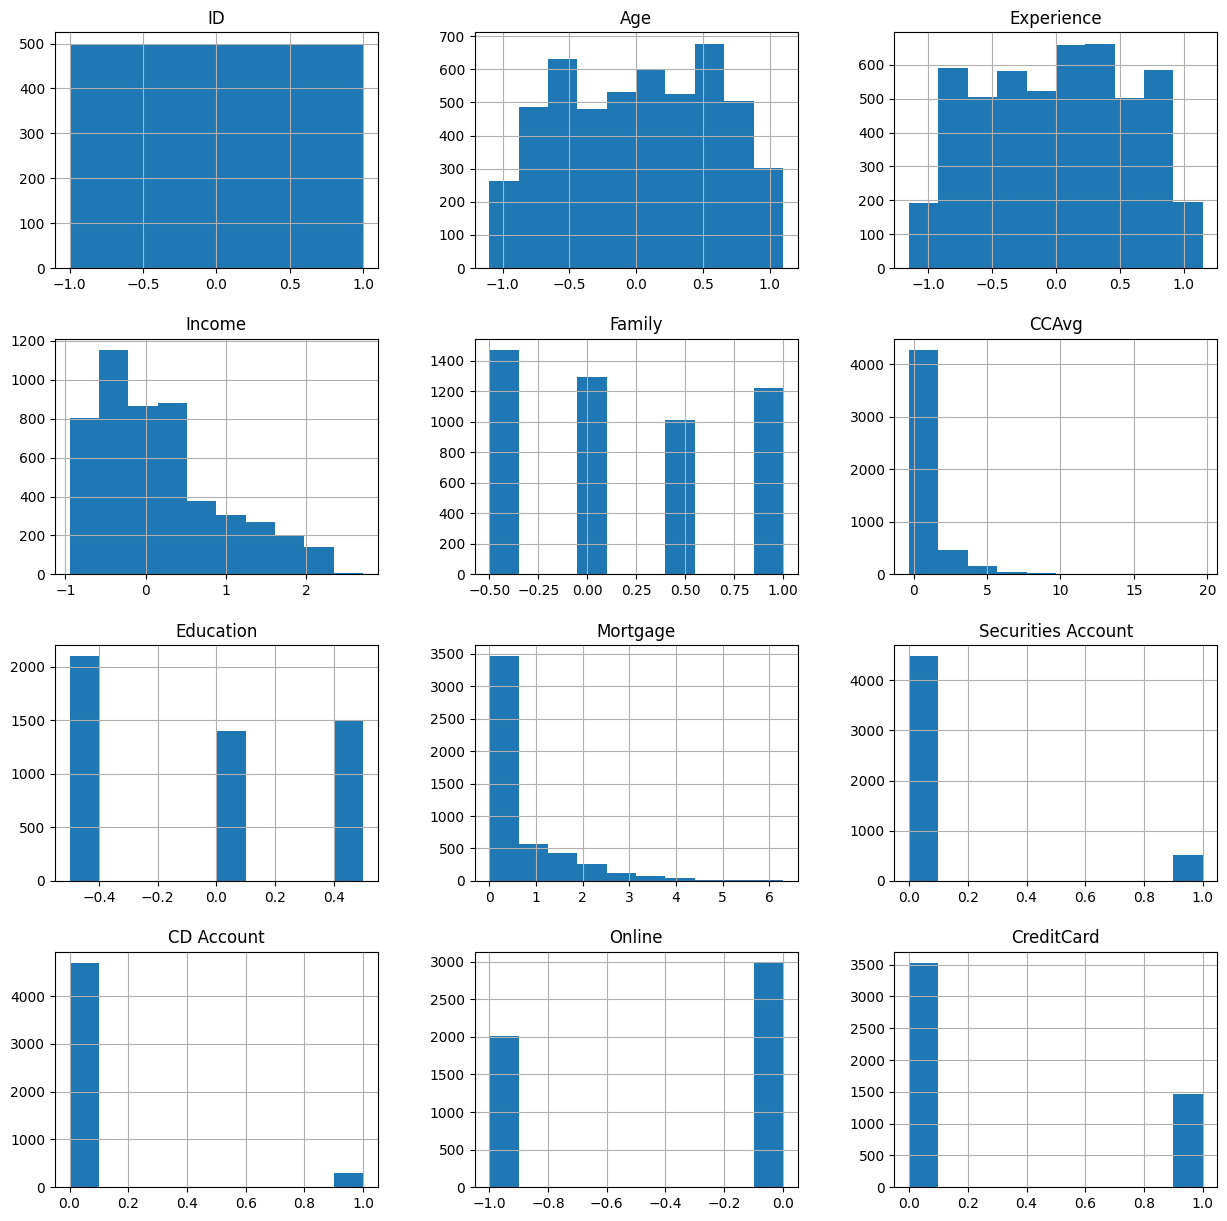

In [221]:
plot = df2.hist(figsize=(15,15))

#### Split Data

In [222]:
X = df2

In [223]:
X.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,-1.0000,-1.0,-0.95,-0.254237,1.0,0.104167,-0.5,0.0,1.0,0.0,-1.0,0.0
1,-0.9996,0.0,-0.05,-0.508475,0.5,0.187500,-0.5,0.0,1.0,0.0,-1.0,0.0
2,-0.9992,-0.3,-0.25,-0.898305,-0.5,-0.312500,-0.5,0.0,0.0,0.0,-1.0,0.0
3,-0.9988,-0.5,-0.55,0.610169,-0.5,0.401786,0.0,0.0,0.0,0.0,-1.0,0.0
4,-0.9984,-0.5,-0.60,-0.322034,1.0,-0.312500,0.0,0.0,0.0,0.0,-1.0,1.0


In [224]:
y.value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

In [225]:
print(X.shape)
print(y.shape)

(5000, 12)
(5000,)


In [226]:
# split 80% training data, 20% sisanya
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [227]:
# Split 10% validasi data, 10% testing data
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [228]:
print("Distribusi training data:", y_train.value_counts(normalize=True))
print("Distribusi validasi data:", y_val.value_counts(normalize=True))
print("Distribusi testing data:", y_test.value_counts(normalize=True))

Distribusi training data: Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Distribusi validasi data: Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Distribusi testing data: Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


In [229]:
print('Shape of training feature:', x_train.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_test.shape)
print('Shape of validation feature:', x_val.shape)
print('Shape of validation label:', y_val.shape)

Shape of training feature: (4000, 12)
Shape of training label: (4000,)
Shape of testing feature: (500, 12)
Shape of training label: (500,)
Shape of validation feature: (500, 12)
Shape of validation label: (500,)


#### Arsitektur Baseline

In [230]:
from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_val_encoded = to_categorical(y_val)
y_test_encoded = to_categorical(y_test)

In [231]:
# jumlah input
n = len(x_train.columns)
# jumlah kelas
num_class = len(np.unique(y_train_encoded))

model = Sequential()
model.add(Dense(n, input_dim=n, activation='relu')) #layer input
model.add(Dense(2*n, activation='relu'))  #hidden layer 1
model.add(Dense(2*n, activation='relu'))  #hidden layer 2
model.add(Dense(num_class, activation='softmax')) #layer output

In [232]:
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [233]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 12)                156       
                                                                 
 dense_26 (Dense)            (None, 24)                312       
                                                                 
 dense_27 (Dense)            (None, 24)                600       
                                                                 
 dense_28 (Dense)            (None, 2)                 50        
                                                                 
Total params: 1118 (4.37 KB)
Trainable params: 1118 (4.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [234]:
training_model = model.fit(x=x_train, y=y_train_encoded, epochs=100, verbose=2, validation_data=(x_val, y_val_encoded))

Epoch 1/100
125/125 - 1s - loss: 0.4013 - accuracy: 0.8930 - val_loss: 0.2494 - val_accuracy: 0.9040 - 1s/epoch - 11ms/step
Epoch 2/100
125/125 - 0s - loss: 0.2240 - accuracy: 0.9038 - val_loss: 0.1768 - val_accuracy: 0.9140 - 343ms/epoch - 3ms/step
Epoch 3/100
125/125 - 0s - loss: 0.1805 - accuracy: 0.9212 - val_loss: 0.1426 - val_accuracy: 0.9480 - 331ms/epoch - 3ms/step
Epoch 4/100
125/125 - 0s - loss: 0.1565 - accuracy: 0.9362 - val_loss: 0.1282 - val_accuracy: 0.9520 - 287ms/epoch - 2ms/step
Epoch 5/100
125/125 - 0s - loss: 0.1384 - accuracy: 0.9482 - val_loss: 0.1128 - val_accuracy: 0.9640 - 282ms/epoch - 2ms/step
Epoch 6/100
125/125 - 0s - loss: 0.1237 - accuracy: 0.9532 - val_loss: 0.1031 - val_accuracy: 0.9680 - 287ms/epoch - 2ms/step
Epoch 7/100
125/125 - 0s - loss: 0.1107 - accuracy: 0.9603 - val_loss: 0.0886 - val_accuracy: 0.9760 - 447ms/epoch - 4ms/step
Epoch 8/100
125/125 - 0s - loss: 0.1003 - accuracy: 0.9628 - val_loss: 0.0819 - val_accuracy: 0.9720 - 424ms/epoch - 3ms

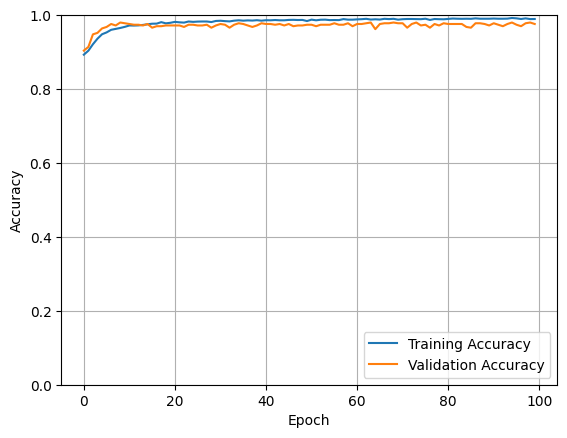

In [235]:
# plotting accuracy
plt.plot(training_model.history['accuracy'], label='Training Accuracy')
plt.plot(training_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.grid(True)

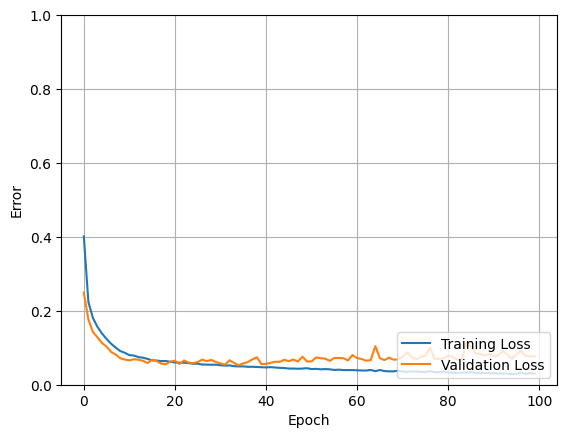

In [236]:
# plotting loss
plt.plot(training_model.history['loss'], label='Training Loss')
plt.plot(training_model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.grid(True)

#### Modifikasi Arsitektur

Modifikasi model arsitektur yang saya lakukan yaitu dengan mengurangi jumlah hidden layer, menambahkan dropout, dan juga menggunakan pendekatan learning rate. Pendekatan ini saya lakukan karena untuk mengurangi kemungkinan overfitting pada training dan juga membantu model untuk mendapatkan hasil yang lebih stabil. Karena jika dilihat dari plotting model baseline arsitektur pada training akurasinya stabil naik, tetapi pada validasi tidak terlalu stabil. Juga masih memiliki nilai loss function yang overfit dan tinggi di awal-awal epoch.

In [257]:
model2 = Sequential()
model2.add(Dense(n, input_dim=n, activation='relu')) #layer input
model2.add(Dropout(0.2))
model2.add(Dense(2*n, activation='relu'))  #hidden layer 1
model2.add(Dropout(0.2))
model2.add(Dense(num_class, activation='softmax')) #layer output

In [258]:
# learning rate
learning_rate = 0.001

# optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [259]:
# compile model
model2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [260]:
model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 12)                156       
                                                                 
 dropout_10 (Dropout)        (None, 12)                0         
                                                                 
 dense_39 (Dense)            (None, 24)                312       
                                                                 
 dropout_11 (Dropout)        (None, 24)                0         
                                                                 
 dense_40 (Dense)            (None, 2)                 50        
                                                                 
Total params: 518 (2.02 KB)
Trainable params: 518 (2.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [264]:
training_model2 = model2.fit(x = x_train, y = y_train_encoded, epochs=80, validation_data= (x_val, y_val_encoded))

Epoch 1/80
125/125 [==============================] - 1s 6ms/step - loss: 0.0585 - accuracy: 0.9835 - val_loss: 0.0508 - val_accuracy: 0.9800
Epoch 2/80
125/125 [==============================] - 1s 6ms/step - loss: 0.0628 - accuracy: 0.9805 - val_loss: 0.0472 - val_accuracy: 0.9820
Epoch 3/80
125/125 [==============================] - 1s 5ms/step - loss: 0.0587 - accuracy: 0.9855 - val_loss: 0.0475 - val_accuracy: 0.9820
Epoch 4/80
125/125 [==============================] - 1s 5ms/step - loss: 0.0637 - accuracy: 0.9825 - val_loss: 0.0508 - val_accuracy: 0.9820
Epoch 5/80
125/125 [==============================] - 1s 4ms/step - loss: 0.0605 - accuracy: 0.9827 - val_loss: 0.0527 - val_accuracy: 0.9780
Epoch 6/80
125/125 [==============================] - 1s 4ms/step - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.0507 - val_accuracy: 0.9800
Epoch 7/80
125/125 [==============================] - 1s 5ms/step - loss: 0.0605 - accuracy: 0.9825 - val_loss: 0.0530 - val_accuracy: 0.9800
Epoch 

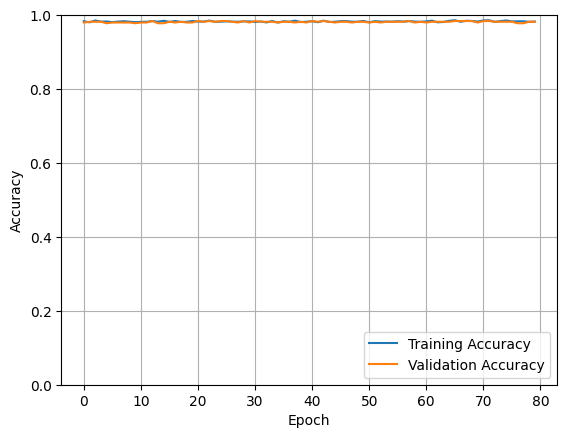

In [265]:
# plotting accuracy
plt.plot(training_model2.history['accuracy'], label='Training Accuracy')
plt.plot(training_model2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.grid(True)

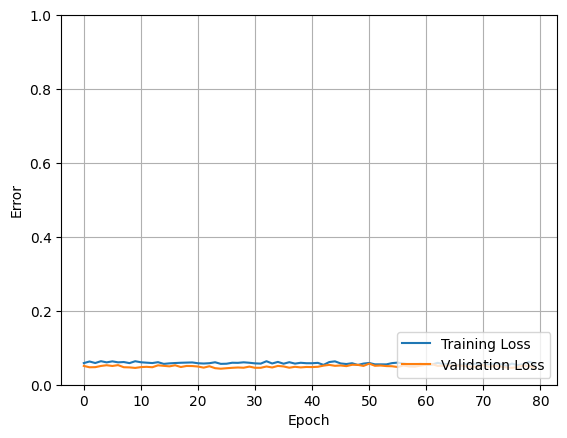

In [266]:
# plotting loss
plt.plot(training_model2.history['loss'], label='Training Loss')
plt.plot(training_model2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.grid(True)

#### Evaluation

In [267]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_model = model.predict(x_test)
y_pred_model_prob = (y_pred_model > 0.5).astype(int)
accuracy_model = accuracy_score(y_test_encoded, y_pred_model_prob)
precision_model = precision_score(y_test_encoded, y_pred_model_prob, average='macro')
recall_model = recall_score(y_test_encoded, y_pred_model_prob, average='macro')
f1_score_model = f1_score(y_test_encoded, y_pred_model_prob, average='macro')

y_pred_model2 = model2.predict(x_test)
y_pred_model2_prob = (y_pred_model2 > 0.5).astype(int)
accuracy_model2 = accuracy_score(y_test_encoded, y_pred_model2_prob)
precision_model2 = precision_score(y_test_encoded, y_pred_model2_prob, average='macro')
recall_model2 = recall_score(y_test_encoded, y_pred_model2_prob, average='macro')
f1_score_model2 = f1_score(y_test_encoded, y_pred_model2_prob, average='macro')

print("Baseline Architecture:")
print(f'Accuracy: {accuracy_model}')
print(f'Precision: {precision_model}')
print(f'Recall: {recall_model}')
print(f'F1-Score: {f1_score_model}')

print("\nModified Architecture:")
print(f'Accuracy: {accuracy_model2}')
print(f'Precision: {precision_model2}')
print(f'Recall: {recall_model2}')
print(f'F1-Score: {f1_score_model2}')

16/16 [==============================] - 0s 2ms/step
Baseline Architecture:
Accuracy: 0.98
Precision: 0.9582336523125996
Recall: 0.9237647492625369
F1-Score: 0.940145565983528

Modified Architecture:
Accuracy: 0.986
Precision: 0.9722832722832724
Recall: 0.9457042772861357
F1-Score: 0.9585067159843985


In [ ]:
fig, axis = plt.subplots(2, 2, figsize=(12,12))
# Baseline Architecture
axis[0,0].plot(training_model.history['accuracy'], label='accuracy')
axis[0,0].plot(training_model.history['val_accuracy'], label='val_accuracy')
axis[0,0].set_ylim([0,1])
axis[0,0].set_xlabel('Epoch')
axis[0,0].set_ylabel('Accuracy')
axis[0,0].legend()
axis[0,0].grid(True)
axis[0,0].set_title('Baseline Architecture')

axis[0,1].plot(training_model.history['loss'], label='loss')
axis[0,1].plot(training_model.history['val_loss'], label='val_loss')
axis[0,1].set_ylim([0,1])
axis[0,1].set_xlabel('Epoch')
axis[0,1].set_ylabel('Loss')
axis[0,1].legend()
axis[0,1].grid(True)
axis[0,1].set_title('Baseline Architecture')

# Modified Architecture
axis[1,0].plot(training_model2.history['accuracy'], label='accuracy')
axis[1,0].plot(training_model2.history['val_accuracy'], label='val_accuracy')
axis[1,0].set_ylim([0,1])
axis[1,0].set_xlabel('Epoch')
axis[1,0].set_ylabel('Accuracy')
axis[1,0].legend()
axis[1,0].grid(True)
axis[1,0].set_title('Modified Architecture')

axis[1,1].plot(training_model2.history['loss'], label='loss')
axis[1,1].plot(training_model2.history['val_loss'], label='val_loss')
axis[1,1].set_ylim([0,1])
axis[1,1].set_xlabel('Epoch')
axis[1,1].set_ylabel('Loss')
axis[1,1].legend()
axis[1,1].grid(True)
axis[1,1].set_title('Modified Architecture')

**PENJELASAN EVALUASI:**<br>

Berdasarkan perhitungan beberapa metrics, Modified Architecture memiliki performa yang sedikit lebih baik daripada Baseline Architecture. Namun, perbedaan performa yang dihasilkan antara kedua architecture juga cukup kecil. <br>

**Accuracy**
* Baseline -> 0.98
* Modified -> 0.986
<br>Peningkatan ini menunjukkan modified architecture sedikit lebih baik dalam mengklasifikasikan data secara keseluruhan

**Precision**
* Baseline -> 0.958
* Modified -> 0.972
<br>Presisi pada modified architecture lebih tinggi yang menunjukkan bahwa model lebih mampu mengidentifikasi kelas positif yang sebenarnya positif.

**Recall**
* Baseline -> 0.924
* Modified -> 0.946
<br>Recall pada modified architecture lebih tinggi yang menunjukkan bahwa model lebih mampu mengidentifikasi semua kelas positif dan tidak banyak melewatkan identifikasi kelas positif.

**F1-Score**
* Baseline -> 0.94
* Modified -> 0.959
<br>F1-Score modified lebih tinggi yang menunjukkan bahwa keseimbangan model lebih baik dalam mengidentifikasi kelas positif yang sebenarnya positif dan tidak banyak melewatkan kelas positif.

#### Sekian Terima Kasih